In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kstest, expon, chi2_contingency
from scipy.special import erf

Method 1

In [2]:
lambda_values = [0.5,1,10,40]
num_samples = 10_000

In [3]:
def F(x,lmbd):
    return 1-np.exp(-lmbd * x)

	Параметр lmbd = 0.5
Mean: 1.9923002457910206, Dispersion: 4.0351290625083385
Chi-square: 14.934671159024337
Theoretical mean: 2.0 Distibution:  4.0
	Параметр lmbd = 1
Mean: 1.0163841408801444, Dispersion: 1.040884832208163
Chi-square: 33.741754584966586
Theoretical mean: 1.0 Distibution:  1.0
	Параметр lmbd = 10
Mean: 0.09940347505719349, Dispersion: 0.00984932306689204
Chi-square: 29.047321379102517
Theoretical mean: 0.1 Distibution:  0.01
	Параметр lmbd = 40
Mean: 0.02521731322484874, Dispersion: 0.0006437114599523652
Chi-square: 34.32335015008182
Theoretical mean: 0.025 Distibution:  0.000625


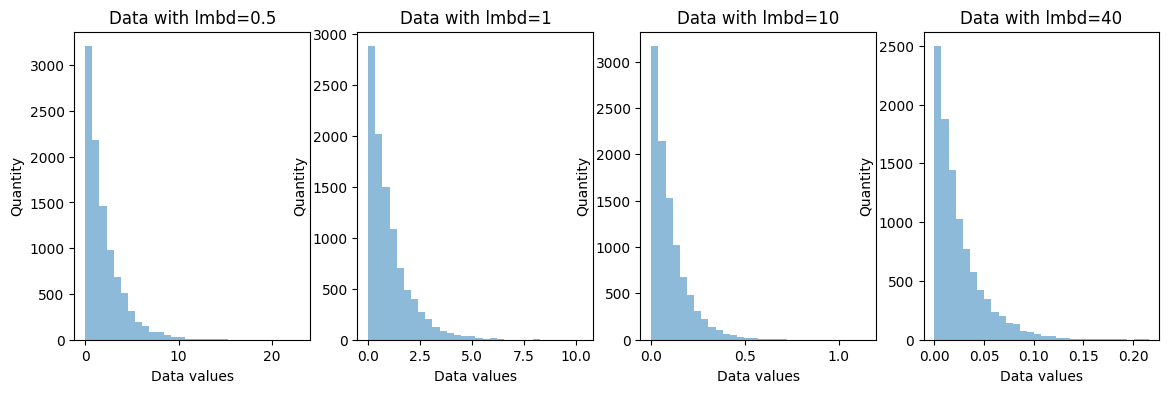

In [4]:
fig, axes = plt.subplots(1,len(lambda_values),figsize=(3.5*len(lambda_values),len(lambda_values)))
for i, lmbd in enumerate(lambda_values):
    ei = np.random.uniform(0,1, size=num_samples)
    xi = -(1/lmbd)*np.log(ei)
    mean = np.mean(xi)
    dispersion = np.var(xi)
    values, col_edges,_ = axes[i].hist(xi, bins=30, alpha=0.5, label='xi')

    observed_values = values
    expected_values = expon.pdf(col_edges[:-1], scale=1/lmbd) * num_samples
    chi2_stat, p_value, dof, _ = chi2_contingency([observed_values, expected_values])
    
    print(f'\tПараметр lmbd = {lmbd}')
    print(f'Mean: {mean}, Dispersion: {dispersion}')
    print(f'Chi-square: {chi2_stat}')
    print(f'Theoretical mean:', 1/lmbd, 'Distibution: ', 1/lmbd**2)
    
    axes[i].set_title(f'Data with lmbd={lmbd}')
    axes[i].set_xlabel('Data values')
    axes[i].set_ylabel('Quantity')
#plt.show()


Method 2

In [24]:
sigma_values, alpha_values = [2,10,20], [5,10,15]
num_samples = 10_000

	Параметри sigma, alpha = 2,5
Mean: 5.0, Dispersion: (4, 2)
Chi-square: 27.18
Theoretical mean: 5 Distibution:  4
	Параметри sigma, alpha = 2,10
Mean: 10.01, Dispersion: (4, 2)
Chi-square: 29.38
Theoretical mean: 10 Distibution:  4
	Параметри sigma, alpha = 2,15
Mean: 15.01, Dispersion: (4, 2)
Chi-square: 69.22
Theoretical mean: 15 Distibution:  4
	Параметри sigma, alpha = 10,5
Mean: 5.07, Dispersion: (100, 2)
Chi-square: 24.28
Theoretical mean: 5 Distibution:  100
	Параметри sigma, alpha = 10,10
Mean: 9.95, Dispersion: (99, 2)
Chi-square: 22.2
Theoretical mean: 10 Distibution:  100
	Параметри sigma, alpha = 10,15
Mean: 15.08, Dispersion: (99, 2)
Chi-square: 36.0
Theoretical mean: 15 Distibution:  100
	Параметри sigma, alpha = 20,5
Mean: 5.14, Dispersion: (400, 2)
Chi-square: 37.21
Theoretical mean: 5 Distibution:  400
	Параметри sigma, alpha = 20,10
Mean: 10.06, Dispersion: (391, 2)
Chi-square: 36.47
Theoretical mean: 10 Distibution:  400
	Параметри sigma, alpha = 20,15
Mean: 15.09, D

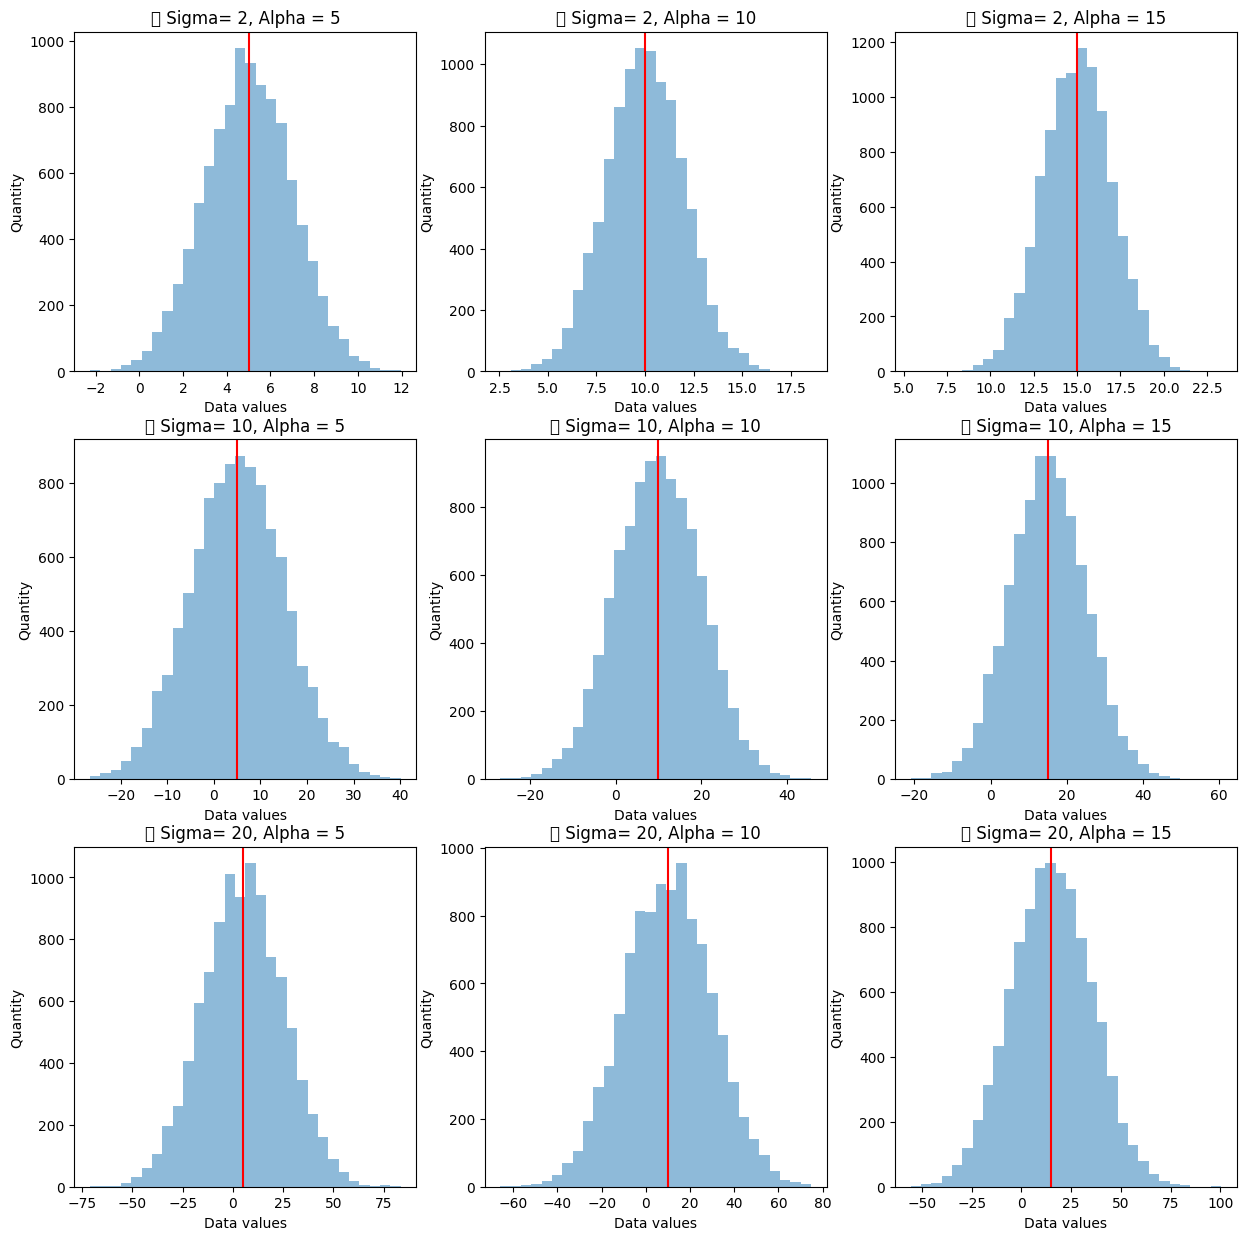

In [52]:
fig, axes = plt.subplots(3,len(sigma_values),figsize=(5*len(sigma_values),5*len(sigma_values)))
for i, sigma in enumerate(sigma_values):
    for j, alpha in enumerate(alpha_values):
        sum_ei = np.random.uniform(0,1, size = (num_samples, 12)).sum(axis=1)
        xi = sigma * (sum_ei-6) + alpha
        mean = np.mean(xi)
        dispersion = np.var(xi)
        values, col_edges,_ = axes[i,j].hist(xi, bins=30, alpha=0.5, label='xi')

        # i use special func from scipy - erf
        F = (1+erf((col_edges - alpha)/(np.sqrt(2)*sigma)))/2

        estim_diff = num_samples * (F[1:]-F[:-1])
        chi2 = np.sum(((values - estim_diff)**2)/estim_diff)

        
        print(f'\tПараметри sigma, alpha = {sigma},{alpha}')
        print(f'Mean: {round(mean,2)}, Dispersion: {round(dispersion),2}')
        print(f'Chi-square: {round(chi2,2)}')
        print(f'Theoretical mean:', alpha, 'Distibution: ', sigma**2)
        
        axes[i,j].set_title(f'\t Sigma= {sigma}, Alpha = {alpha}')
        axes[i,j].set_xlabel('Data values')
        axes[i,j].set_ylabel('Quantity')
        axes[i,j].axvline(x=mean,color='r')


	Параметри sigma, alpha = 2,5
Mean: 5.0, Dispersion: (4, 2)
Chi-square: 32.68
Theoretical mean: 5 Distibution:  4
	Параметри sigma, alpha = 2,10
Mean: 9.99, Dispersion: (4, 2)
Chi-square: 43.88
Theoretical mean: 10 Distibution:  4
	Параметри sigma, alpha = 2,15
Mean: 14.99, Dispersion: (4, 2)
Chi-square: 27.35
Theoretical mean: 15 Distibution:  4
	Параметри sigma, alpha = 10,5
Mean: 5.0, Dispersion: (101, 2)
Chi-square: 24.22
Theoretical mean: 5 Distibution:  100
	Параметри sigma, alpha = 10,10
Mean: 10.04, Dispersion: (100, 2)
Chi-square: 28.51
Theoretical mean: 10 Distibution:  100
	Параметри sigma, alpha = 10,15
Mean: 14.85, Dispersion: (99, 2)
Chi-square: 43.02
Theoretical mean: 15 Distibution:  100
	Параметри sigma, alpha = 20,5
Mean: 4.82, Dispersion: (395, 2)
Chi-square: 23.63
Theoretical mean: 5 Distibution:  400
	Параметри sigma, alpha = 20,10
Mean: 9.92, Dispersion: (398, 2)
Chi-square: 23.16
Theoretical mean: 10 Distibution:  400
	Параметри sigma, alpha = 20,15
Mean: 15.01, 

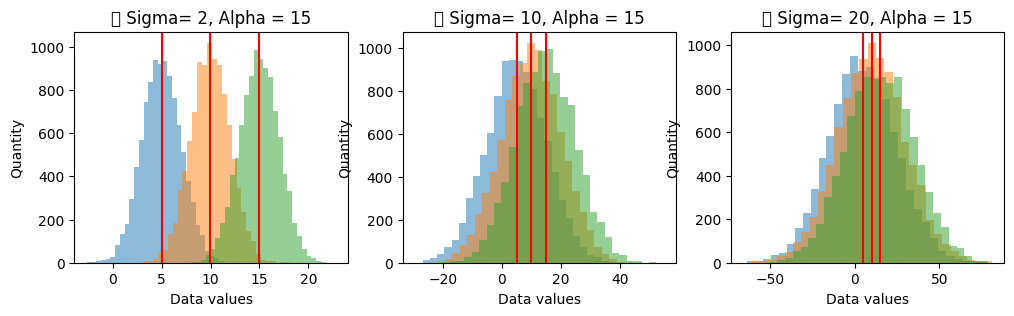

In [51]:
fig, axes = plt.subplots(1,len(sigma_values), figsize=(4*len(sigma_values),len(sigma_values)))
for i, sigma in enumerate(sigma_values):
    for j, alpha in enumerate(alpha_values):
        sum_ei = np.random.uniform(0,1, size = (num_samples, 12)).sum(axis=1)
        xi = sigma * (sum_ei-6) + alpha
        mean = np.mean(xi)
        dispersion = np.var(xi)
        values, col_edges,_ = axes[i].hist(xi, bins=30, alpha=0.5, label='xi')

        # i use special func from scipy - erf
        F = (1+erf((col_edges - alpha)/(np.sqrt(2)*sigma)))/2

        estim_diff = num_samples * (F[1:]-F[:-1])
        chi2 = np.sum(((values - estim_diff)**2)/estim_diff)

        
        print(f'\tПараметри sigma, alpha = {sigma},{alpha}')
        print(f'Mean: {round(mean,2)}, Dispersion: {round(dispersion),2}')
        print(f'Chi-square: {round(chi2,2)}')
        print(f'Theoretical mean:', alpha, 'Distibution: ', sigma**2)


        axes[i].set_title(f'\t Sigma= {sigma}, Alpha = {alpha}')
        axes[i].set_xlabel('Data values')
        axes[i].set_ylabel('Quantity')
        axes[i].axvline(x=mean,color='r')

Method 3

In [80]:
num_samples = 10_000
a_values, c_values= [pow(2,31),pow(3,8),pow(2,14)], [pow(5,33),pow(5,7),pow(5,16)]

	Параметри c, a = 116415321826934814453125,2147483648
Mean: 0.5, Dispersion: (0, 2)
Theoretical mean: 15 Distibution:  400
	Параметри c, a = 116415321826934814453125,6561
Mean: 0.5, Dispersion: (0, 2)
Theoretical mean: 15 Distibution:  400
	Параметри c, a = 116415321826934814453125,16384
Mean: 0.5, Dispersion: (0, 2)
Theoretical mean: 15 Distibution:  400
	Параметри c, a = 78125,2147483648
Mean: 0.5, Dispersion: (0, 2)
Theoretical mean: 15 Distibution:  400
	Параметри c, a = 78125,6561
Mean: 0.5, Dispersion: (0, 2)
Theoretical mean: 15 Distibution:  400
	Параметри c, a = 78125,16384
Mean: 0.5, Dispersion: (0, 2)
Theoretical mean: 15 Distibution:  400
	Параметри c, a = 152587890625,2147483648
Mean: 0.5, Dispersion: (0, 2)
Theoretical mean: 15 Distibution:  400
	Параметри c, a = 152587890625,6561
Mean: 0.5, Dispersion: (0, 2)
Theoretical mean: 15 Distibution:  400
	Параметри c, a = 152587890625,16384
Mean: 0.5, Dispersion: (0, 2)
Theoretical mean: 15 Distibution:  400


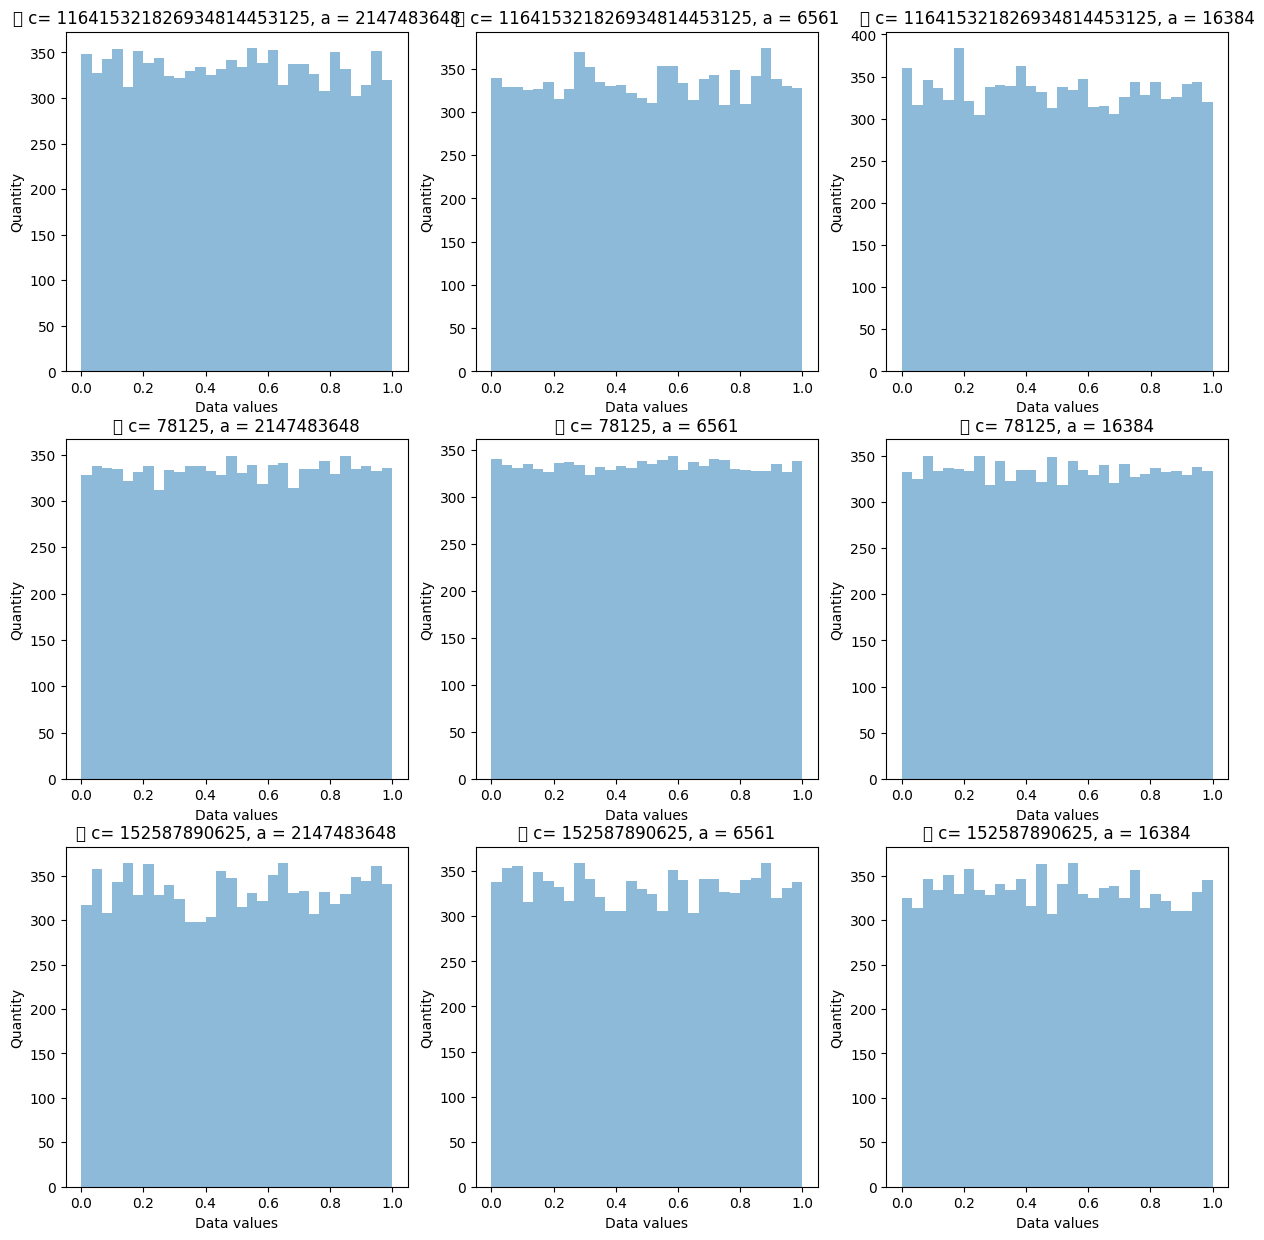

In [81]:
fig, axes = plt.subplots(3,len(a_values), figsize=(5*len(a_values),5*len(c_values)))
for i, c in enumerate(c_values):    
    for j, a in enumerate(a_values):
        zi = 10        
        xi = np.array([])
        for _ in range(num_samples):
            zi1 = (a*zi) % c
            xi = np.append(xi, zi1/c)
            zi=zi1
        mean = np.mean(xi)
        dispersion = np.var(xi)
        values, col_edges,_ = axes[i,j].hist(xi, bins=30, alpha=0.5, label='xi')
        

        estim_diff = (col_edges[1:]-col_edges[:-1]*num_samples)
        # print(type(values))
        # print(type(estim_diff))
        #chi2 = np.sum(((values - estim_diff)**2)/estim_diff)
       
                
        print(f'\tПараметри c, a = {c},{a}')
        print(f'Mean: {round(mean,2)}, Dispersion: {round(dispersion),2}')
        #print(f'Chi-square: {round(chi2,2)}')
        print(f'Theoretical mean:', alpha, 'Distibution: ',  sigma**2)


        axes[i,j].set_title(f'\t c= {c}, a = {a}')
        axes[i,j].set_xlabel('Data values')
        axes[i,j].set_ylabel('Quantity')